# Day 6: 70 Days Pre-Bootcamp Online Class with Data Science Nigeria - Machine Learning Stream #DSN70daysofML
Pickling and Scaling <br>
*Notes*
* Pickle is serialization of any Python object (dictionary or classifier)
* The purpose of pickling a model is to avoid retraining the model during execution.

In [1]:
#import libraries
import numpy as np
import pandas as pd 
import quandl, math, datetime
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

from sklearn import preprocessing, svm #svm = Support Vector Machine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = quandl.get('WIKI/GOOGL')
print (df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [3]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [4]:
df = df [['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Low'])/ df['Adj. Low'] * 100.0 #percentage change
df['PCT_change'] = (df['Adj. Close'] - df['Adj. Open'])/ df['Adj. Open'] * 100.0 #Daily percentage change

In [5]:
df = df [['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
print (df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  8.441017    0.324968   44659000.0
2004-08-20   54.322689  8.537313    7.227007   22834300.0
2004-08-23   54.869377  4.062357   -1.227880   18256100.0
2004-08-24   52.597363  7.753210   -5.726357   15247300.0
2004-08-25   53.164113  3.966115    1.183658    9188600.0


In [6]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True) #Machine learning can't work with nan data, 'df.fillna' so replaces null values in the dataset

In [7]:
#Regression is used to forecast out
forecast_out = int(math.ceil(0.01*len(df))) #math.ceil rounds up to the nearest whole number
df['label'] = df [forecast_col].shift(-forecast_out) #... future data

print (df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  8.441017    0.324968   44659000.0  69.078238
2004-08-20   54.322689  8.537313    7.227007   22834300.0  67.839414
2004-08-23   54.869377  4.062357   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  7.753210   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  3.966115    1.183658    9188600.0  71.219849


## Defining features and labels
* X = features
* y = labels <br>
y = ax + b

In [8]:
X = np.array(df.drop(['label'],1)) #everything except the label column
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
df.dropna(inplace=True)

y = np.array(df['label'])

print(len(X), len(y))

3389 3389


## Train and Test the Classifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)

#Save the classifier
with open ('linearregression.pickle','wb') as f:
    pickle.dump(clf, f)

#to open the pickle file
pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9808488071093224


In [10]:
forecast_set = clf.predict(X_lately) #stock prices for the next 30 days
print(forecast_set, accuracy, forecast_set)

[1077.81499207 1091.90195801 1105.51675609 1100.46500266 1094.07382921
 1091.99130177 1090.7292746  1086.82762852 1081.0684519  1076.57691896
 1074.83180562 1092.75515604 1111.29221255 1117.03648995 1131.54049073
 1135.88769399 1134.11255026 1131.85369347 1133.58590157 1150.74735313
 1150.52973797 1160.13283267 1156.84445419 1165.17809132 1184.59235956
 1198.08405533 1191.85689772 1203.96139902 1208.46289343 1208.18078826
 1198.96712353 1203.7931801  1202.4488231  1137.91387961 1082.03744264] 0.9808488071093224 [1077.81499207 1091.90195801 1105.51675609 1100.46500266 1094.07382921
 1091.99130177 1090.7292746  1086.82762852 1081.0684519  1076.57691896
 1074.83180562 1092.75515604 1111.29221255 1117.03648995 1131.54049073
 1135.88769399 1134.11255026 1131.85369347 1133.58590157 1150.74735313
 1150.52973797 1160.13283267 1156.84445419 1165.17809132 1184.59235956
 1198.08405533 1191.85689772 1203.96139902 1208.46289343 1208.18078826
 1198.96712353 1203.7931801  1202.4488231  1137.91387961 

In [11]:
df['Forecast'] = np.nan

#finding the last date
late_date = df.iloc[-1].name
last_unix = late_date.timestamp()
one_day = 86400 #Seconds in a day
next_unix = last_unix + one_day

In [12]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range (len(df.columns)-1)] + [i]

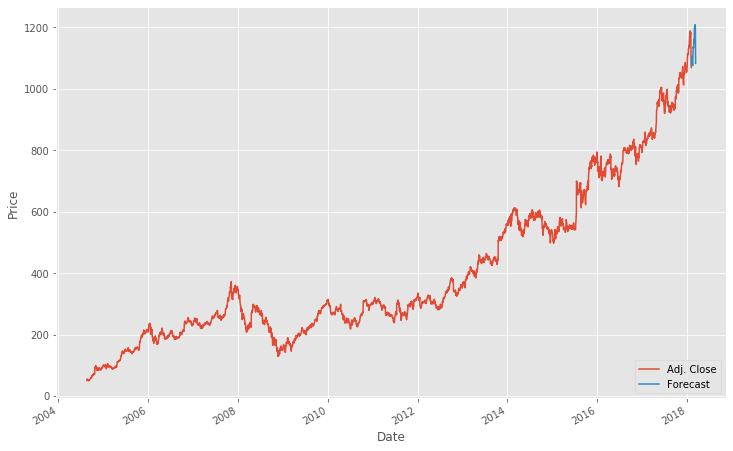

In [13]:
#visualizing the classifier
df['Adj. Close'].plot(figsize= (12,8))
df['Forecast'].plot(figsize= (12,8))
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()